In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%ls

apicache/                        flatten-occupation.py           out.txt
data_label.py                    flatten.py                      pywiki-test.py
Field_of_work_Analysis.ipynb     fow_id2label.json               Sandbox.ipynb
field_of_work-index.csv          occ_id2label.json               throttle.ctrl
flatten_field_of_work-index.csv  Occupation_Data_Analysis.ipynb  Untitled.ipynb
flatten_occupation-index.csv     occupation-index.csv


In [2]:
occ = pd.read_csv('flatten_occupation-index.csv')
occ.head(2)

,qid,transgender female,intersex,fa'afafine,transgender,American football player,Gender fluid,sociologist,transgender male,female creature,male creature,woman,genderqueer,female,male,kathoey
0,Q4249459,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Q12878771,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
import json
with open('occ_id2label.json', 'r') as f:
    labels = json.load(f)
labels['Q4249459']

{u'subclass': [u'Uncategorized'], u'title': u'Qutb'}

In [5]:
subclass_df = pd.DataFrame(labels).T.reset_index()
subclass_df.columns = ['qid', 'subclass', 'title']
subclass_df.head(5)

,qid,subclass,title
0,Q1003337,[Uncategorized],list of French painters
1,Q1004,[work],comic
2,Q1006696,[Federal judge],United States federal judge
3,Q1008663,[Uncategorized],NaN
4,Q101333,[Uncategorized],mechanical engineering


In [9]:
occ = pd.merge(subclass_df, occ, on='qid')

In [19]:
occ.describe()
#occ.sum()

,transgender female,intersex,fa'afafine,transgender,American football player,Gender fluid,sociologist,transgender male,female creature,male creature,woman,genderqueer,female,male,kathoey
count,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000
mean,0.045294,0.003036,0.000253,0.000759,0.000253,0.001518,0.000253,0.010881,0.001265,0.000253,0.000759,0.005061,75.543775,424.615385,0.000759
std,0.880466,0.059449,0.015907,0.027545,0.015907,0.038940,0.015907,0.137347,0.042073,0.015907,0.027545,0.095321,1079.789199,5132.309051,0.027545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000
max,49.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,4.000000,53855.000000,224573.000000,1.000000


In [72]:
occ.sort("male", ascending=False).head()

,qid,subclass,title,transgender female,intersex,fa'afafine,transgender,American football player,Gender fluid,sociologist,...,female creature,male creature,woman,genderqueer,female,male,kathoey,total,ratio(m/f),ratio(f/m)
3737,Q82955,[human],politician,8,1,0,0,0,0,0,...,0,0,0,0,25046,224573,0,749073.077949,8.966422,0.111527
3904,Q937857,"[sportsperson, competitive player]",association football player,0,0,1,0,0,0,0,...,0,0,0,0,5929,168369,0,523103.432752,28.397538,0.035214
2635,Q33999,[artist],actor,49,1,0,0,0,1,0,...,1,0,1,1,53855,74110,1,384180.102793,1.376102,0.726690
18,Q1028181,[visual artist],painter,1,0,0,0,0,0,0,...,0,0,0,0,8350,56759,0,195340.944598,6.797485,0.147113
2735,Q36180,[author],writer,9,0,0,0,0,0,0,...,0,0,0,1,13131,47935,0,183367.924455,3.650522,0.273933


In [71]:
occ.sort("female", ascending=False).head()

,qid,subclass,title,transgender female,intersex,fa'afafine,transgender,American football player,Gender fluid,sociologist,...,female creature,male creature,woman,genderqueer,female,male,kathoey,total,ratio(m/f),ratio(f/m)
2635,Q33999,[artist],actor,49,1,0,0,0,1,0,...,1,0,1,1,53855,74110,1,384180.102793,1.376102,0.726690
3737,Q82955,[human],politician,8,1,0,0,0,0,0,...,0,0,0,0,25046,224573,0,749073.077949,8.966422,0.111527
1446,Q177220,[vocalist],singer,14,0,0,0,0,1,0,...,0,0,0,4,19037,22538,0,124822.028567,1.183905,0.844662
2735,Q36180,[author],writer,9,0,0,0,0,0,0,...,0,0,0,1,13131,47935,0,183367.924455,3.650522,0.273933
1718,Q1930187,[non-fiction writer],journalist,1,0,0,0,0,0,1,...,1,0,0,0,11117,45126,0,168779.305543,4.059189,0.246355


In [69]:
occ['total'] = occ[occ.columns[3:]].sum(axis=1)
occ.sort('total', ascending=False).head()

,qid,subclass,title,transgender female,intersex,fa'afafine,transgender,American football player,Gender fluid,sociologist,...,female creature,male creature,woman,genderqueer,female,male,kathoey,total,ratio(m/f),ratio(f/m)
0,Q1003337,[Uncategorized],list of French painters,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,inf,inf,0
2436,Q2994367,[Uncategorized],Councillor of State,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,inf,inf,0
2424,Q2985386,[Uncategorized],editorial board,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,inf,inf,0
2426,Q2986261,[Uncategorized],commercial,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,inf,inf,0
2428,Q2986308,[Commissioner],Commissaire de police,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,inf,inf,0


In [70]:
occ['ratio(m/f)'] = occ['male'] / occ['female']
occ['ratio(f/m)'] = 1/occ['ratio(m/f)']
occ.head()

,qid,subclass,title,transgender female,intersex,fa'afafine,transgender,American football player,Gender fluid,sociologist,...,female creature,male creature,woman,genderqueer,female,male,kathoey,total,ratio(m/f),ratio(f/m)
0,Q1003337,[Uncategorized],list of French painters,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,inf,inf,0
1,Q1004,[work],comic,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,inf,inf,0
2,Q1006696,[Federal judge],United States federal judge,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,inf,inf,0
3,Q1008663,[Uncategorized],NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,inf,inf,0
4,Q101333,[Uncategorized],mechanical engineering,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,inf,inf,0


In [87]:
occ.sort('ratio(m/f)', ascending=False)[2348:].head(10)

,qid,subclass,title,transgender female,intersex,fa'afafine,transgender,American football player,Gender fluid,sociologist,...,female creature,male creature,woman,genderqueer,female,male,kathoey,total,ratio(m/f),ratio(f/m)
670,Q14128148,"[sportsperson, competitive player]",gridiron football player,0,0,0,0,0,0,0,...,0,0,0,0,7,12746,0,40089.857692,1820.857143,0.000549
1339,Q17351861,"[sportsperson, competitive player]",Gaelic football player,0,0,0,0,0,0,0,...,0,0,0,0,1,1512,0,6069.000661,1512.000000,0.000661
705,Q14373094,"[sportsperson, competitive player]",rugby league player,0,0,0,0,0,0,0,...,0,0,0,0,5,6839,0,21909.800731,1367.800000,0.000731
568,Q13414980,"[sportsperson, association football player, co...",Australian-rules footballer,0,0,0,0,0,0,0,...,0,0,0,0,11,9944,0,30779.001106,904.000000,0.001106
2390,Q29182,"[minister, priest]",bishop,0,0,0,0,0,0,0,...,0,0,0,0,1,838,0,3415.001193,838.000000,0.001193
1744,Q1937431,[Uncategorized],organ maker,0,0,0,0,0,0,0,...,0,0,0,0,1,678,0,2753.001475,678.000000,0.001475
2291,Q2727289,"[professional wrestler, martial artist]",rikishi,0,0,0,0,0,0,0,...,0,0,0,0,3,1540,0,5201.335281,513.333333,0.001948
2198,Q250867,[Christian priest],Catholic priest,0,0,0,0,0,0,0,...,0,0,0,0,3,1214,0,4106.669138,404.666667,0.002471
111,Q10841764,[racecar driver],Formula One driver,0,0,0,0,0,0,0,...,0,0,0,0,2,601,0,2116.503328,300.500000,0.003328
2025,Q2143894,[referee],cricket umpire,0,0,0,0,0,0,0,...,0,0,0,0,3,867,0,2942.003460,289.000000,0.003460


In [94]:
occ.sort(['female', 'ratio(f/m)'], ascending=False).head()

,qid,subclass,title,transgender female,intersex,fa'afafine,transgender,American football player,Gender fluid,sociologist,...,female creature,male creature,woman,genderqueer,female,male,kathoey,total,ratio(m/f),ratio(f/m)
2635,Q33999,[artist],actor,49,1,0,0,0,1,0,...,1,0,1,1,53855,74110,1,384180.102793,1.376102,0.726690
3737,Q82955,[human],politician,8,1,0,0,0,0,0,...,0,0,0,0,25046,224573,0,749073.077949,8.966422,0.111527
1446,Q177220,[vocalist],singer,14,0,0,0,0,1,0,...,0,0,0,4,19037,22538,0,124822.028567,1.183905,0.844662
2735,Q36180,[author],writer,9,0,0,0,0,0,0,...,0,0,0,1,13131,47935,0,183367.924455,3.650522,0.273933
1718,Q1930187,[non-fiction writer],journalist,1,0,0,0,0,0,1,...,1,0,0,0,11117,45126,0,168779.305543,4.059189,0.246355


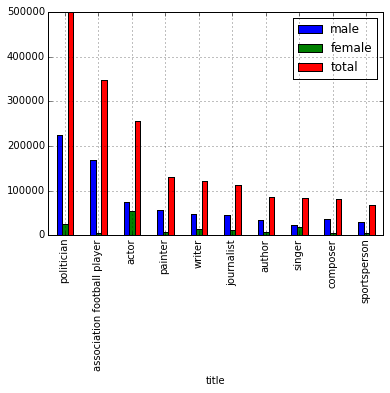

In [68]:
_socc = occ.sort('total', ascending=False).loc[:, ['title', 'male', 'female', 'total']]
_socc = _socc.set_index('title')
#_socc.plot(kind='bar')
_socc[:10].plot(kind='bar')